# Importing libraries and constants

In [44]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from constants import general_location

### Helpful functions for working with data

In [45]:
def scatter_df(df, color = 'b', label = 'df_plot', linewidths = 1):
    plt.scatter(np.arange(len(df)), df, color = color, linewidths = linewidths, label = label)
    plt.legend()
    plt.show()


def df_return(csv_file, validation = 0):

    #check flag for state status
    if validation == 1:
        file_path = os.path.join(general_location, "validation", csv_file)
    else:
        file_path = os.path.join(general_location, "data", csv_file)

    df = pd.read_csv(file_path)

    return df


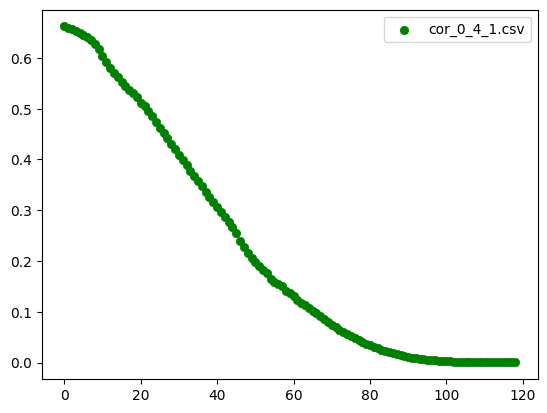

In [46]:
example_nf = df_return('cor_0_4_0.csv') #noise-free

scatter_df(example_nf, color = 'g', label = 'cor_0_4_1.csv', linewidths = 0.5)

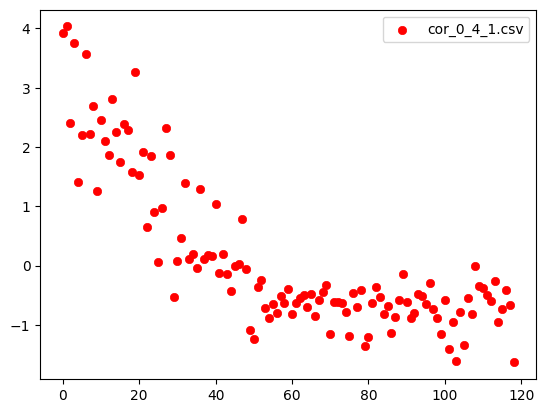

In [47]:
example_nf = df_return('cor_0_4_9.csv', validation = 1) #noise-free

scatter_df(example_nf, color = 'r', label = 'cor_0_4_1.csv', linewidths = 0.5)

### Comparsion output with different noise level with noise-free target

In [48]:
def validation_comparison(file_id):
    fig, axs = plt.subplots(3, 3, figsize = (16, 12))
    for i in range(1, 10):
        
        y_values = df_return(f'{file_id}_{i}.csv',  validation = 1)
        axs[(i - 1) // 3, (i - 1) % 3].scatter(np.arange(len(y_values)), y_values, linewidths = 0.5)
        axs[(i - 1) // 3, (i - 1) % 3].set_title(f'{file_id}_{i}.csv')
    plt.tight_layout()
    plt.show()

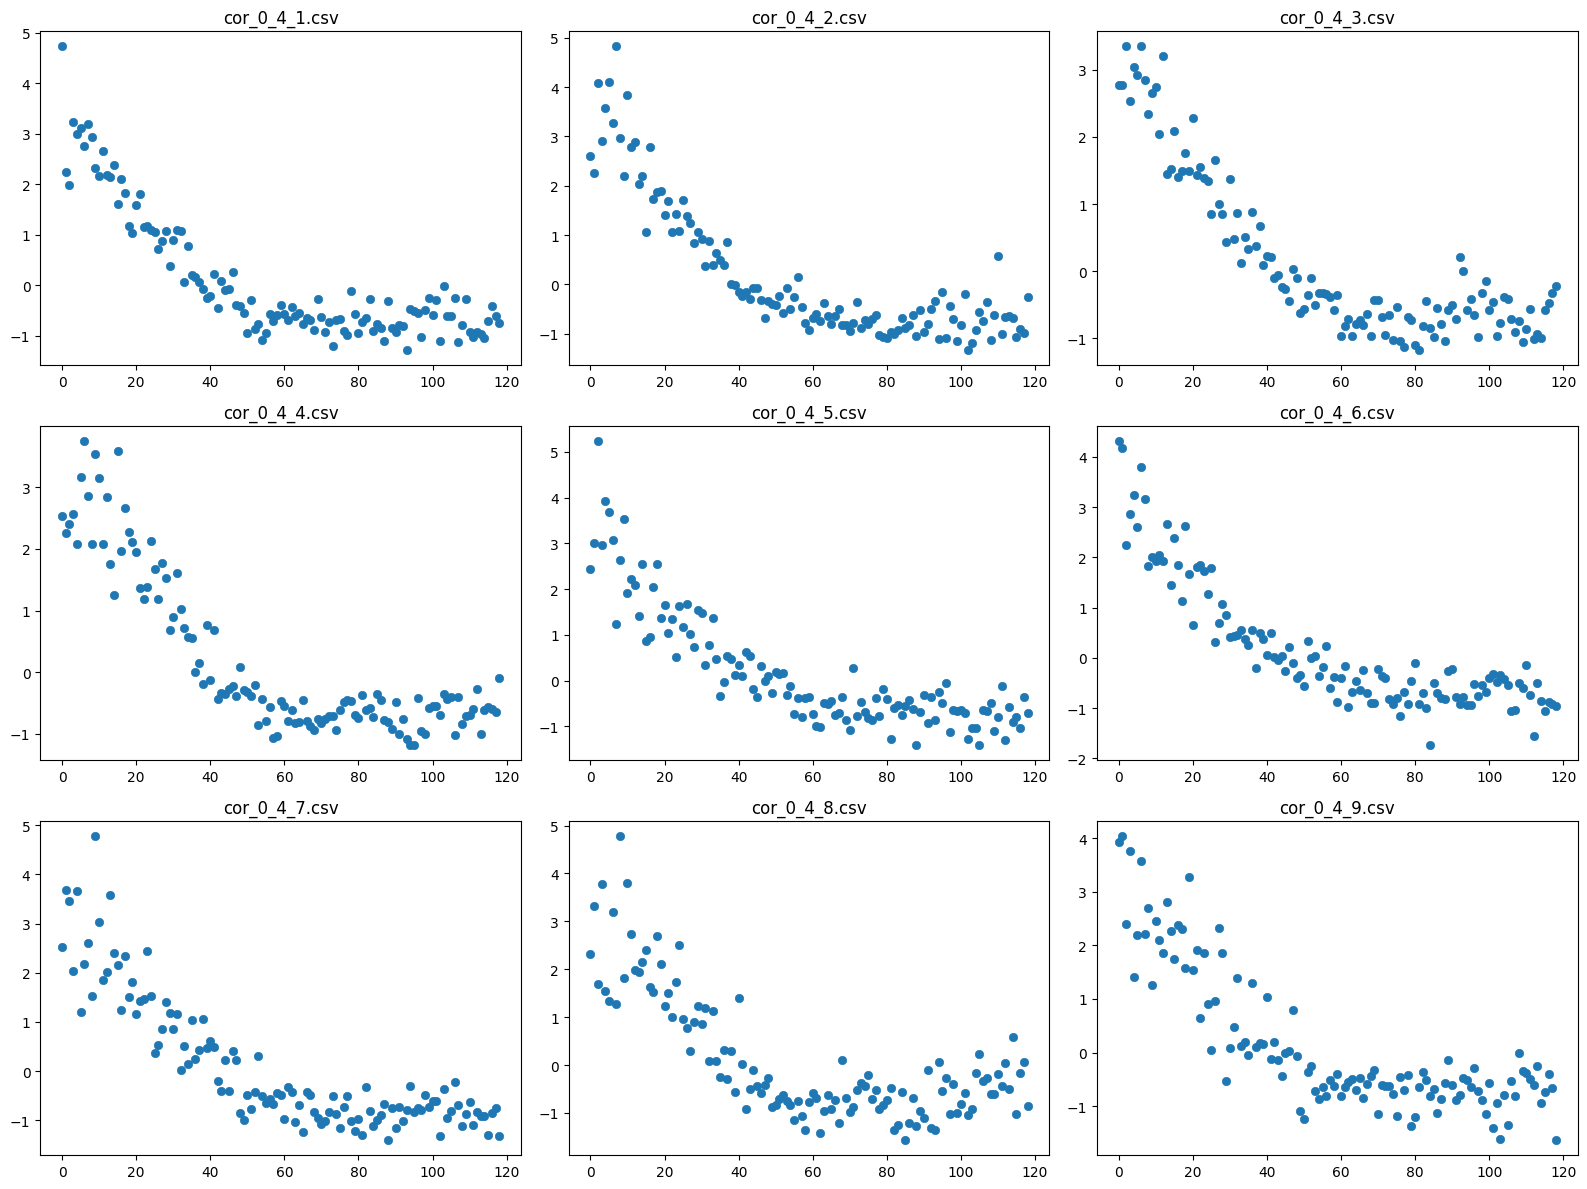

In [49]:
file_id = 'cor_0_4' #you can choose another one
validation_comparison(file_id)

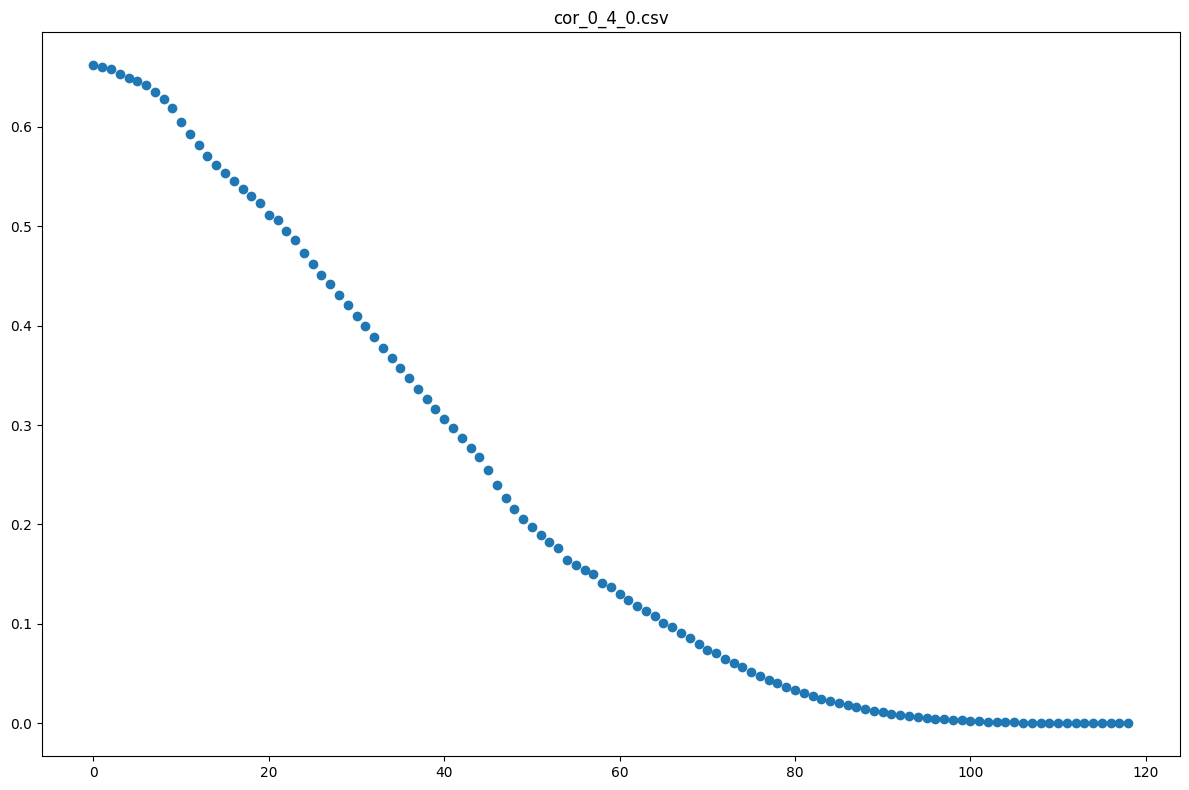

In [50]:
fig, axs = plt.subplots(1, figsize = (12, 8))

y_values = df_return(f'{file_id}_{0}.csv',  validation = 0)
axs.scatter(np.arange(len(y_values)), y_values)
axs.set_title(f'{file_id}_{0}.csv')
plt.tight_layout()
plt.show()

**So we can see that NN performs well with low noise curves, but performs worse with high noise. In addition, the network does a good job of smoothing the function near zero. We can conclude that it is worth trying to diversify the network architecture and strengthen it.**